1. Load the dataset

In [ ]:
# 1. Install required libraries (only run once)
# You can uncomment and run these if libraries are not installed
# !pip install pandas numpy scikit-learn matplotlib seaborn imbalanced-learn missingno plotly

# 2. Load required libraries

import pandas as pd                # For data manipulation (similar to dplyr in R)
import numpy as np                 # For numerical operations
import matplotlib.pyplot as plt    # For creating plots
import seaborn as sns              # For better visualizations (similar to ggplot2 in R)
import missingno as msno           # For visualizing missing data (similar to naniar and VIM)
from sklearn.model_selection import train_test_split  # For train-test splitting
from sklearn.preprocessing import StandardScaler      # For feature scaling (standardization)
from sklearn.svm import SVC                           # For Support Vector Machine model
from sklearn.linear_model import LogisticRegression   # For Logistic Regression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay  # Evaluation tools
from imblearn.combine import SMOTEENN                 # To balance dataset (similar to ROSE in R)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving stroke_prediction_dataset.csv to stroke_prediction_dataset.csv


In [ ]:
import pandas as pd
import io

# Load the uploaded file
stroke_data = pd.read_csv('stroke_prediction_dataset.csv')

# Show the first few rows
stroke_data.head()


,Patient ID,Patient Name,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,...,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Symptoms,Diagnosis
0,18153,Mamooty Khurana,56,Male,0,1,Married,Self-employed,Rural,130.91,...,Social Drinker,Moderate,0,Yes,Vegan,3.48,140/108,"HDL: 68, LDL: 133","Difficulty Speaking, Headache",Stroke
1,62749,Kaira Subramaniam,80,Male,0,0,Single,Self-employed,Urban,183.73,...,Never,Low,0,No,Paleo,1.73,146/91,"HDL: 63, LDL: 70","Loss of Balance, Headache, Dizziness, Confusion",Stroke
2,32145,Dhanush Balan,26,Male,1,1,Married,Never Worked,Rural,189.00,...,Rarely,High,0,Yes,Paleo,7.31,154/97,"HDL: 59, LDL: 95","Seizures, Dizziness",Stroke
3,6154,Ivana Baral,73,Male,0,0,Married,Never Worked,Urban,185.29,...,Frequent Drinker,Moderate,0,No,Paleo,5.35,174/81,"HDL: 70, LDL: 137","Seizures, Blurred Vision, Severe Fatigue, Head...",No Stroke
4,48973,Darshit Jayaraman,51,Male,1,1,Divorced,Self-employed,Urban,177.34,...,Rarely,Low,0,Yes,Pescatarian,6.84,121/95,"HDL: 65, LDL: 68",Difficulty Speaking,Stroke


In [ ]:
# Check dataset shape
print("Dataset Shape:", stroke_data.shape)

Dataset Shape: (15000, 22)


/tmp/ipython-input-1189830512.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=stroke_data, x='Diagnosis', palette=colors)


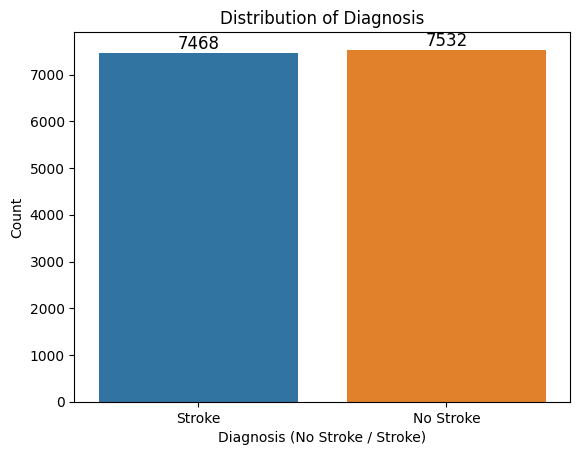

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example colors for two bars: No Stroke = Blue, Stroke = Orange
colors = ['#1f77b4', '#ff7f0e']

ax = sns.countplot(data=stroke_data, x='Diagnosis', palette=colors)

# Annotate bars with counts
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2.,
            p.get_height(),
            f'{int(p.get_height())}',
            ha='center', va='bottom', fontsize=12)

plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis (No Stroke / Stroke)')
plt.ylabel('Count')

plt.show()


2. Drop unnecessary columns

In [ ]:
# Drop unnecessary columns
stroke_data.drop(columns=["Patient ID", "Patient Name"], inplace=True)

# Verify the change by checking the first few rows
stroke_data.head()

,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,Body Mass Index (BMI),Smoking Status,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Symptoms,Diagnosis
0,56,Male,0,1,Married,Self-employed,Rural,130.91,22.37,Non-smoker,Social Drinker,Moderate,0,Yes,Vegan,3.48,140/108,"HDL: 68, LDL: 133","Difficulty Speaking, Headache",Stroke
1,80,Male,0,0,Single,Self-employed,Urban,183.73,32.57,Non-smoker,Never,Low,0,No,Paleo,1.73,146/91,"HDL: 63, LDL: 70","Loss of Balance, Headache, Dizziness, Confusion",Stroke
2,26,Male,1,1,Married,Never Worked,Rural,189.00,20.32,Formerly Smoked,Rarely,High,0,Yes,Paleo,7.31,154/97,"HDL: 59, LDL: 95","Seizures, Dizziness",Stroke
3,73,Male,0,0,Married,Never Worked,Urban,185.29,27.50,Non-smoker,Frequent Drinker,Moderate,0,No,Paleo,5.35,174/81,"HDL: 70, LDL: 137","Seizures, Blurred Vision, Severe Fatigue, Head...",No Stroke
4,51,Male,1,1,Divorced,Self-employed,Urban,177.34,29.06,Currently Smokes,Rarely,Low,0,Yes,Pescatarian,6.84,121/95,"HDL: 65, LDL: 68",Difficulty Speaking,Stroke


3. Identify missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       15000 non-null  int64  
 1   Gender                    15000 non-null  object 
 2   Hypertension              15000 non-null  int64  
 3   Heart Disease             15000 non-null  int64  
 4   Marital Status            15000 non-null  object 
 5   Work Type                 15000 non-null  object 
 6   Residence Type            15000 non-null  object 
 7   Average Glucose Level     15000 non-null  float64
 8   Body Mass Index (BMI)     15000 non-null  float64
 9   Smoking Status            15000 non-null  object 
 10  Alcohol Intake            15000 non-null  object 
 11  Physical Activity         15000 non-null  object 
 12  Stroke History            15000 non-null  int64  
 13  Family History of Stroke  15000 non-null  object 
 14  Dietar

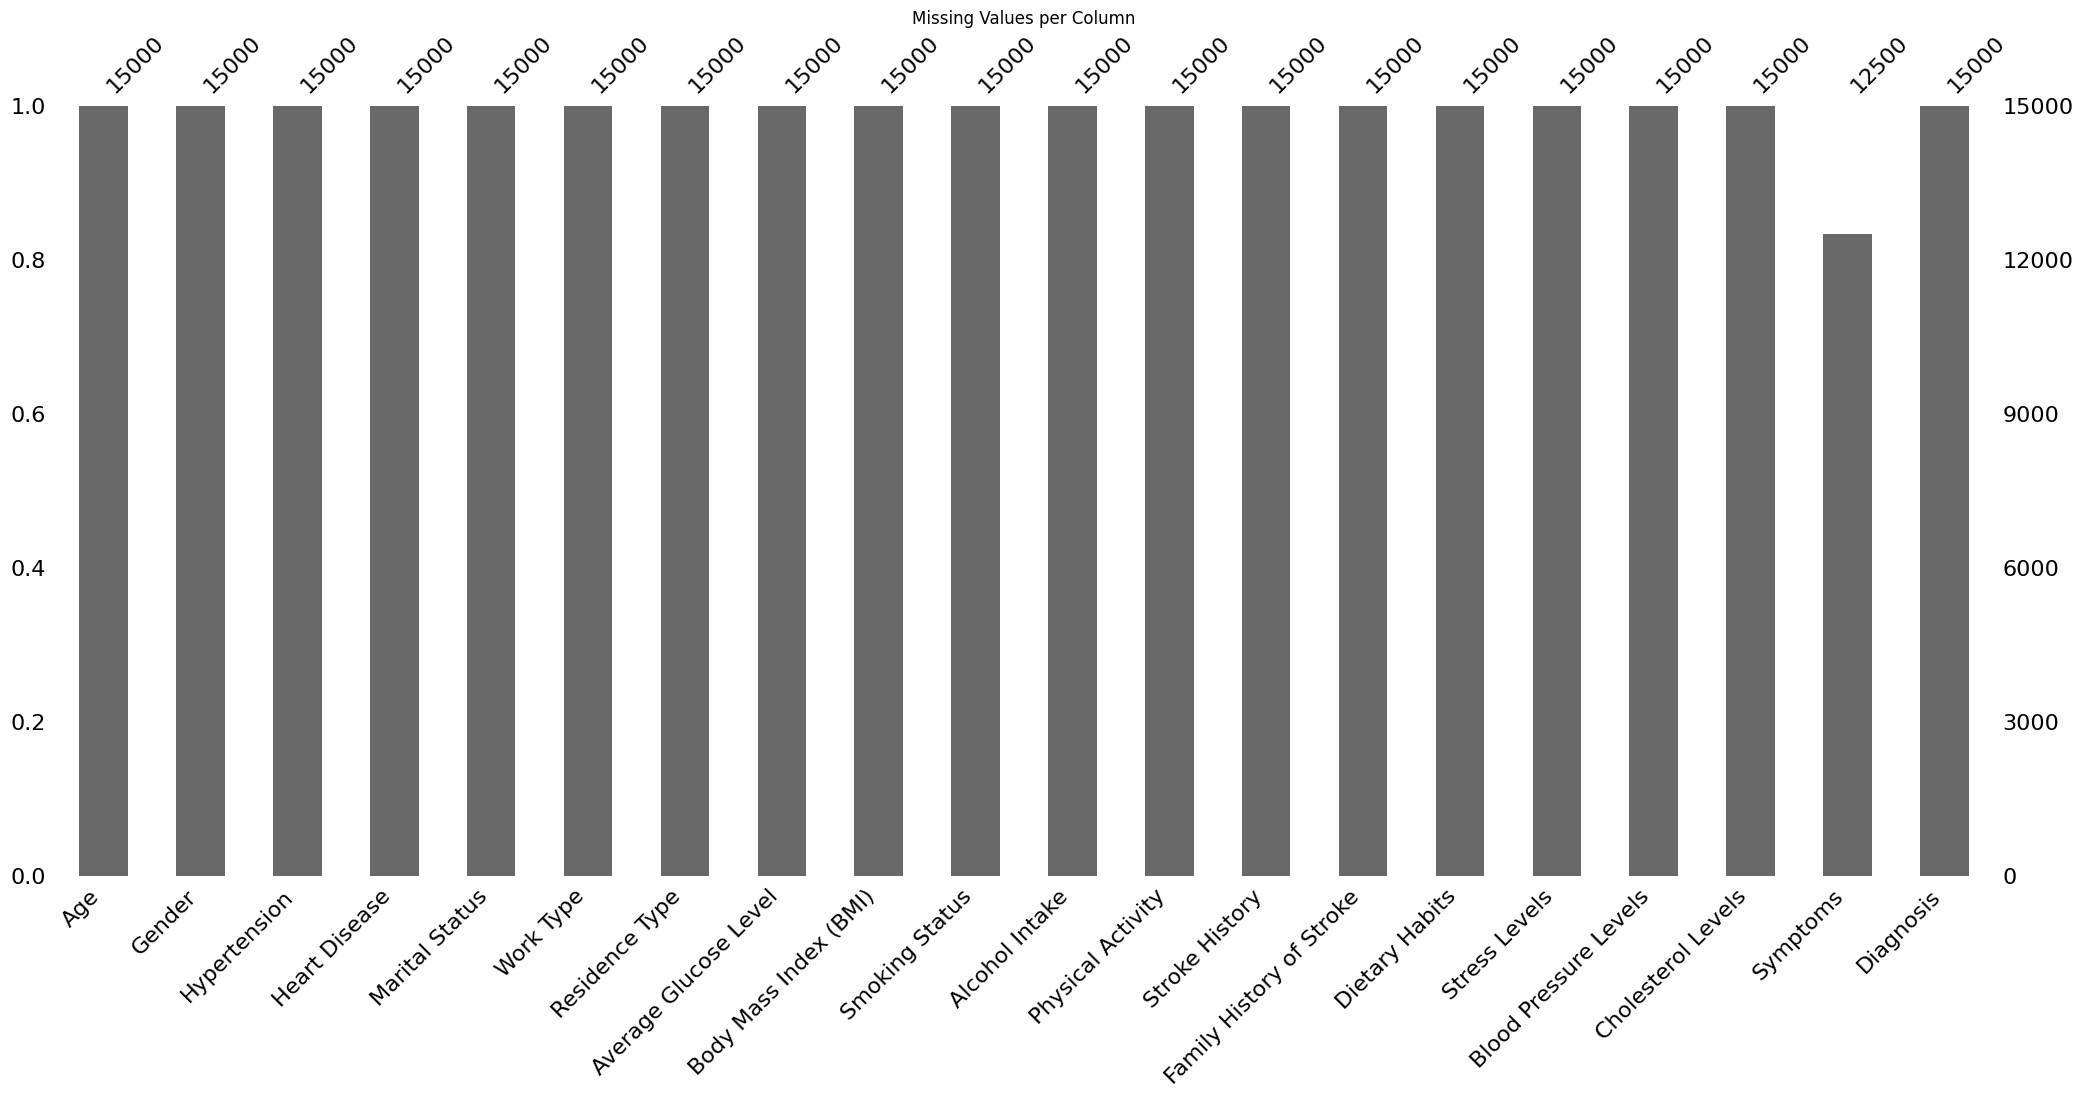

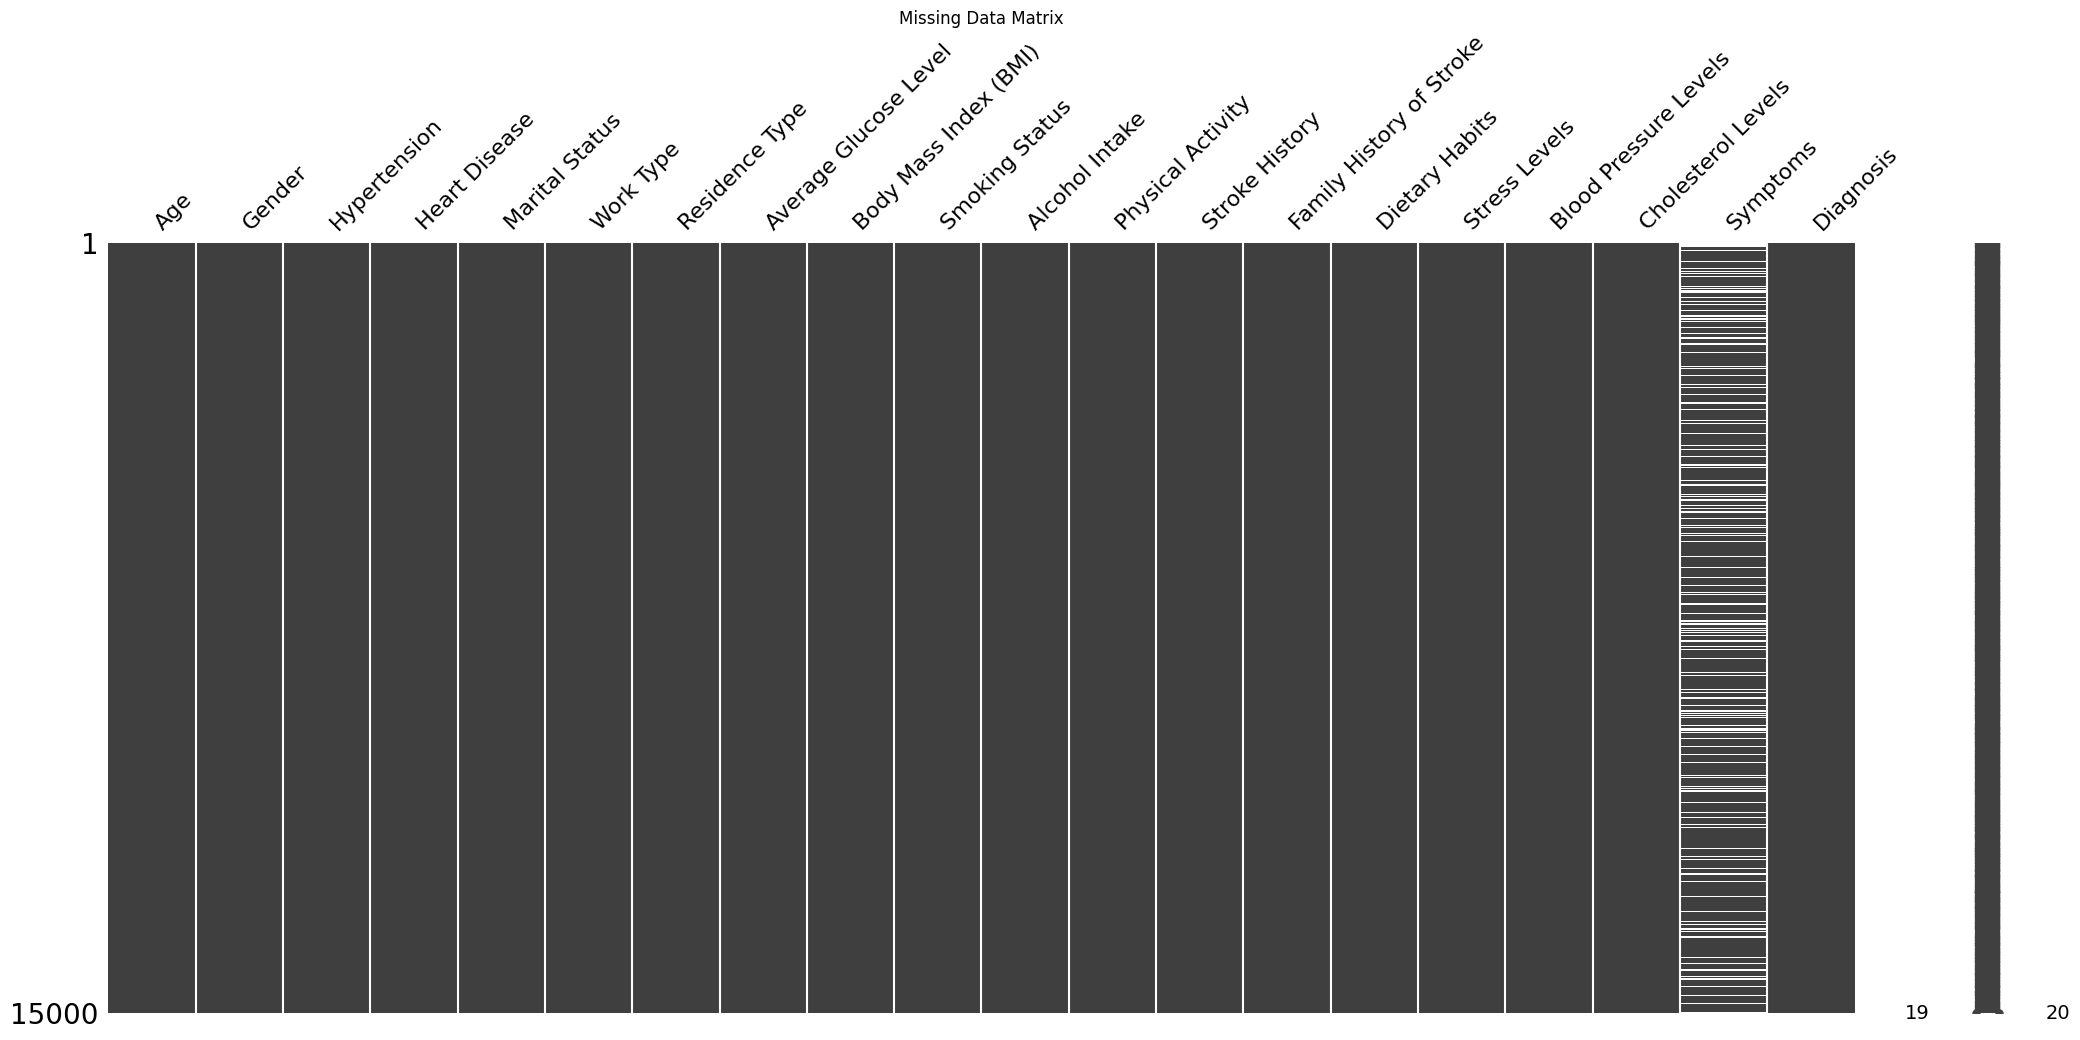

Missing Values After Handling:
Age                            0
Gender                         0
Hypertension                   0
Heart Disease                  0
Marital Status                 0
Work Type                      0
Residence Type                 0
Average Glucose Level          0
Body Mass Index (BMI)          0
Smoking Status                 0
Alcohol Intake                 0
Physical Activity              0
Stroke History                 0
Family History of Stroke       0
Dietary Habits                 0
Stress Levels                  0
Blood Pressure Levels          0
Cholesterol Levels             0
Symptoms                    2500
Diagnosis                      0
dtype: int64


In [ ]:
# 4. Explore dataset
print(stroke_data.info())
print(stroke_data.describe())

# 5. Visualize missing data
msno.bar(stroke_data)
plt.title("Missing Values per Column")
plt.show()

msno.matrix(stroke_data)
plt.title("Missing Data Matrix")
plt.show()

print("Missing Values After Handling:")
print(stroke_data.isnull().sum())



4. Resolving Symptoms missing values

In [ ]:
# Extract the 'Symptoms' column
symptoms_column = stroke_data['Symptoms']

# Show the first few entries
print(symptoms_column.head())

# Check how many missing values are in the Symptoms column
missing_count = stroke_data['Symptoms'].isna().sum()
print(f"Missing values in 'Symptoms': {missing_count}")

#This treats "No symptoms reported" as a valid category
stroke_data['Symptoms'] = stroke_data['Symptoms'].fillna("No symptoms reported")


0                        Difficulty Speaking, Headache
1      Loss of Balance, Headache, Dizziness, Confusion
2                                  Seizures, Dizziness
3    Seizures, Blurred Vision, Severe Fatigue, Head...
4                                  Difficulty Speaking
Name: Symptoms, dtype: object
Missing values in 'Symptoms': 2500


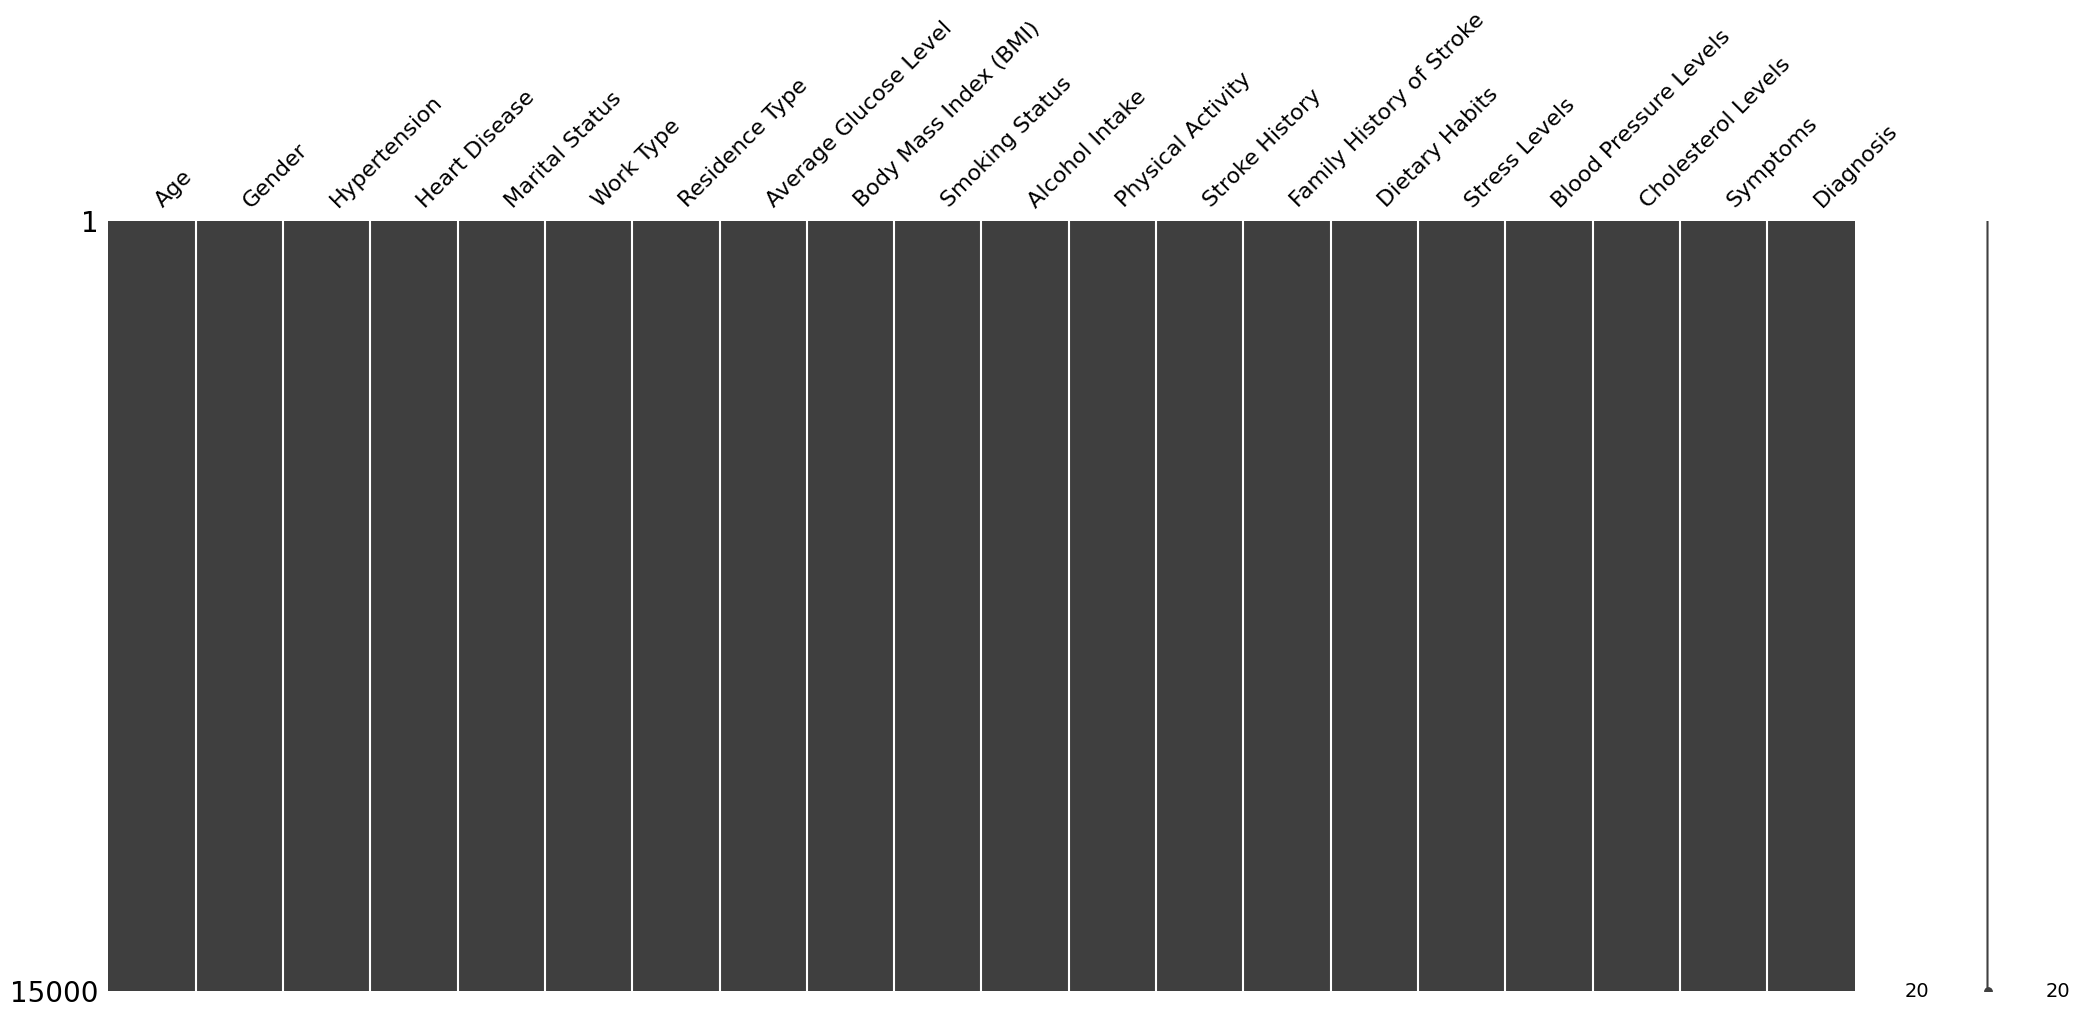

In [ ]:
# Visualize missing data using a matrix plot
msno.matrix(stroke_data)
plt.show()


In [ ]:
# Count the occurrences of each unique value in the 'stroke' column
stroke_data['Diagnosis'].value_counts()

,count
Diagnosis,
No Stroke,7532
Stroke,7468


In [ ]:
# 4. Convert categorical columns to category dtype
categorical_cols = ["Gender", "Marital_Status", "Work_Type", "Residence_Type",
                    "Smoking_Status", "Alcohol_Intake", "Physical_Activity",
                    "Stroke_History", "Family_History_of_Stroke", "Dietary_Habits",
                    "Stress_Levels", "Blood_Pressure_Levels", "Cholesterol_Levels",
                    "Symptoms", "Diagnosis"]

# Clean column names to avoid issues with spaces
stroke_data.columns = stroke_data.columns.str.strip()

# Convert categorical columns
for col in categorical_cols:
    if col in stroke_data.columns:
        stroke_data[col] = stroke_data[col].astype("category")

print(stroke_data.columns)




Index(['Age', 'Gender', 'Hypertension', 'Heart Disease', 'Marital Status',
       'Work Type', 'Residence Type', 'Average Glucose Level',
       'Body Mass Index (BMI)', 'Smoking Status', 'Alcohol Intake',
       'Physical Activity', 'Stroke History', 'Family History of Stroke',
       'Dietary Habits', 'Stress Levels', 'Blood Pressure Levels',
       'Cholesterol Levels', 'Symptoms', 'Diagnosis'],
      dtype='object')


5. Data Splitting

In [ ]:
# Split the data into features (X) and target (y)
X = stroke_data.drop('Diagnosis', axis=1)  # Features
y = stroke_data['Diagnosis']               # Target variable (stroke category)

In [ ]:

# 7. Train-test split (80/20)
X = pd.get_dummies(X, drop_first=True)  # One-hot encode categorical variables, drop first column to avoid multicollinearity
y = y.cat.codes        # Convert labels to 0 and 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

# 8. Balance training data using SMOTE + ENN (similar to ROSE)
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=123)
X_train_bal, y_train_bal = smote_enn.fit_resample(X_train, y_train)

# 9. Standardize numeric features
scaler = StandardScaler()
X_train_bal = scaler.fit_transform(X_train_bal)
X_test = scaler.transform(X_test)

6. Train SVM

In [ ]:
# 10. Train SVM model
svm_model = SVC(kernel='rbf', C=1, probability=True)
svm_model.fit(X_train_bal, y_train_bal)

# 11. Predict on test set
svm_predictions = svm_model.predict(X_test)



SVM Confusion Matrix:
[[  58 1448]
 [  50 1444]]

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.04      0.07      1506
           1       0.50      0.97      0.66      1494

    accuracy                           0.50      3000
   macro avg       0.52      0.50      0.37      3000
weighted avg       0.52      0.50      0.36      3000



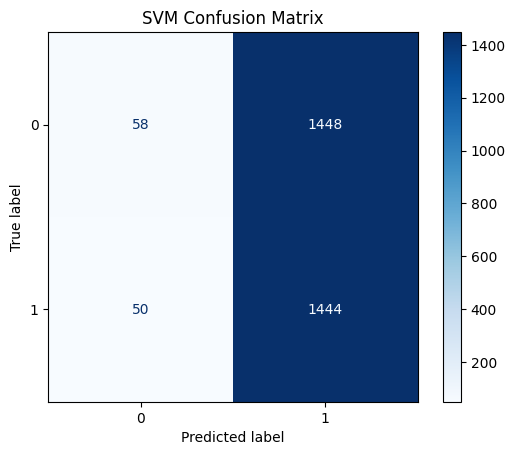

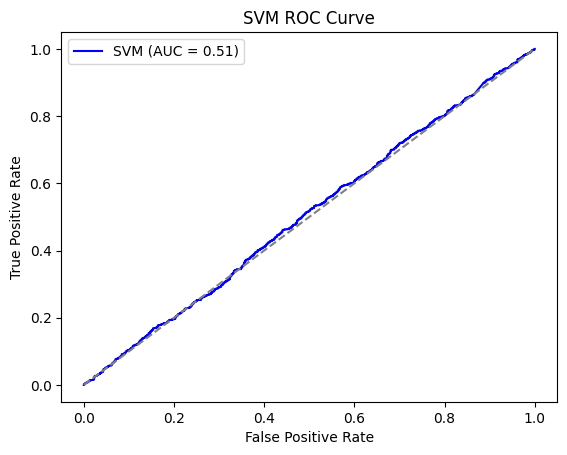

In [ ]:
# 12. Evaluate SVM using confusion matrix
print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, svm_predictions))
print("\nClassification Report:\n", classification_report(y_test, svm_predictions))

# 13. Visualize confusion matrix for SVM
ConfusionMatrixDisplay.from_predictions(y_test, svm_predictions, cmap="Blues")
plt.title("SVM Confusion Matrix")
plt.show()

# 14. ROC Curve for SVM
svm_probs = svm_model.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_probs)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.plot(fpr_svm, tpr_svm, color='blue', label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("SVM ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()



7. Train Logistic Regression

Logistic Regression Confusion Matrix:
[[ 456 1050]
 [ 439 1055]]

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.30      0.38      1506
           1       0.50      0.71      0.59      1494

    accuracy                           0.50      3000
   macro avg       0.51      0.50      0.48      3000
weighted avg       0.51      0.50      0.48      3000



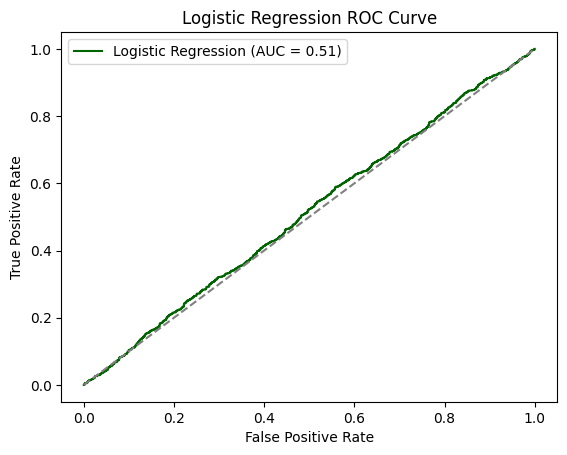

In [ ]:
# 15. Logistic Regression Model
logit_model = LogisticRegression(max_iter=1000)
logit_model.fit(X_train_bal, y_train_bal)

# 16. Predict with Logistic Regression
logit_probs = logit_model.predict_proba(X_test)[:, 1]
logit_pred_classes = np.where(logit_probs > 0.5, 1, 0)

# 17. Confusion Matrix for Logistic Regression
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, logit_pred_classes))
print("\nClassification Report:\n", classification_report(y_test, logit_pred_classes))

# 18. ROC Curve for Logistic Regression
fpr_log, tpr_log, _ = roc_curve(y_test, logit_probs)
roc_auc_log = auc(fpr_log, tpr_log)

plt.plot(fpr_log, tpr_log, color='darkgreen', label=f'Logistic Regression (AUC = {roc_auc_log:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("Logistic Regression ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


In [ ]:
## k-Fold Cross-Validation with Multiple Metrics

from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
k = 5

# Define the metrics you want to use
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Perform cross-validation with multiple metrics
cv_results = cross_validate(model, X, y, cv=k, scoring=scoring_metrics)

# Print the results
print("Cross-validation results:")
for metric in scoring_metrics:
    # The results dictionary keys are in the format 'test_<metric_name>'
    metric_scores = cv_results[f'test_{metric}']
    print(f"{metric.capitalize()} scores for each of the {k} folds: {metric_scores}")
    print(f"Average {metric}: {metric_scores.mean():.4f}")

print(f"\nFit times: {cv_results['fit_time']}")
print(f"Score times: {cv_results['score_time']}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-validation results:
Accuracy scores for each of the 5 folds: [0.487      0.497      0.48966667 0.49666667 0.50866667]
Average accuracy: 0.4958
Precision scores for each of the 5 folds: [0.48506967 0.49488055 0.4874406  0.49423729 0.50630392]
Average precision: 0.4936
Recall scores for each of the 5 folds: [0.4892905  0.48527443 0.48058902 0.48827863 0.51105157]
Average recall: 0.4909
F1 scores for each of the 5 folds: [0.48717094 0.49003042 0.48399056 0.49123989 0.50866667]
Average f1: 0.4922
Roc_auc scores for each of the 5 folds: [0.48989495 0.48978739 0.48421086 0.5018736  0.5141392 ]
Average roc_auc: 0.4960

Fit times: [401.24536371 393.38718557 394.18376493 393.6840508  387.77899337]
Score times: [1.29402208 1.00210142 1.37573671 1.25490856 0.86128855]
